# Business Problem

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

This data set is of information containing bike rental data, this data contains info of number of bikes rented per day.

Data was picked from UCI archive https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

# Import Statements

In [ ]:
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

**Intentions and explanation:** This section holds all the import statements for various libraries I have used all over the project. where and how they are used will be explained and evident as we go on with the pipeline.

## Data Exploration & Pre-processing

### Uploading dataset

In [ ]:
rl = pd.read_csv("bike_rentals.csv", encoding='ISO-8859-1')
rl = pd.DataFrame(rl)
rl = rl.set_index('Date')
rl.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Performing checks for data cleaning

In [ ]:
rl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 01/12/2017 to 30/11/2018
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
mem

Intentions and explanation: info() method of pandas dataframe that gives us a consize summary of the dataframe.(pandas.pydata.org, n.d.)

In [ ]:
rl.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Intentions and explanation: Returns the sum of all columns repsectively with the number of null values if present

Intentions and explanation: Returns the number unique values of all columns.

### feature engineering

In [ ]:
rl.index = pd.to_datetime(rl.index, format='%d/%m/%Y')
rl = rl.sort_index()
# Extract month and day of the week from the index
rl['month'] = rl.index.month
rl['day of the week'] = rl.index.dayofweek

In [ ]:
scaler = MinMaxScaler()
rl[['normalized_temp', 'norm Dew point temperature(°C)']] = scaler.fit_transform(rl[['Temperature(°C)', 'Dew point temperature(°C)']])

# Drop the original columns if needed
rl = rl.drop(columns=['Temperature(°C)', 'Dew point temperature(°C)'])

In [ ]:
# binary_encoder = ce.BinaryEncoder(cols=['Holiday', 'Functioning Day'])
# rl = binary_encoder.fit_transform(rl)
rl['Holiday'] = rl['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
rl['Functioning Day'] = rl['Functioning Day'].map({'No': 0, 'Yes': 1})
rl = pd.get_dummies(rl, columns=['Seasons'])

In [ ]:
rl

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,day of the week,normalized_temp,norm Dew point temperature(°C),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
Date,,,,,,,,,,,,,,,,,,
2017-12-01,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,12,4,0.220280,0.224913,False,False,False,True
2017-12-01,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,12,4,0.215035,0.224913,False,False,False,True
2017-12-01,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,12,4,0.206294,0.223183,False,False,False,True
2017-12-01,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,12,4,0.202797,0.224913,False,False,False,True
2017-12-01,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,12,4,0.206294,0.207612,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,34,2.6,1894,0.0,0.0,0.0,0,1,11,4,0.384615,0.351211,True,False,False,False
2018-11-30,764,20,37,2.3,2000,0.0,0.0,0.0,0,1,11,4,0.370629,0.358131,True,False,False,False
2018-11-30,694,21,39,0.3,1968,0.0,0.0,0.0,0,1,11,4,0.356643,0.358131,True,False,False,False


Intentions and explanation: Label encoding Seasons, Holiday and Functioning Day

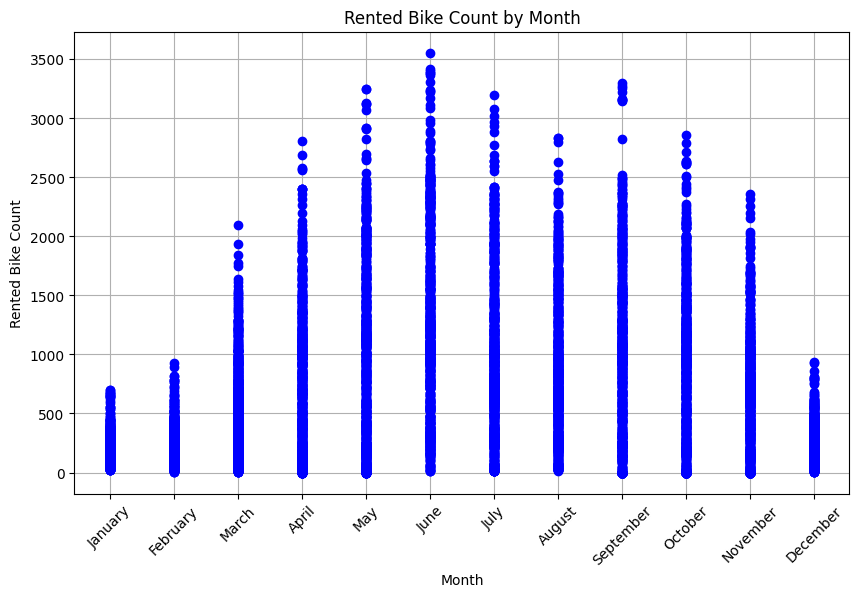

In [ ]:
import calendar
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(rl['month'], rl['Rented Bike Count'], marker='o', linestyle='None', color='b')
plt.title('Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.grid(True)

# Setting month names as x-ticks
month_names = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.show()

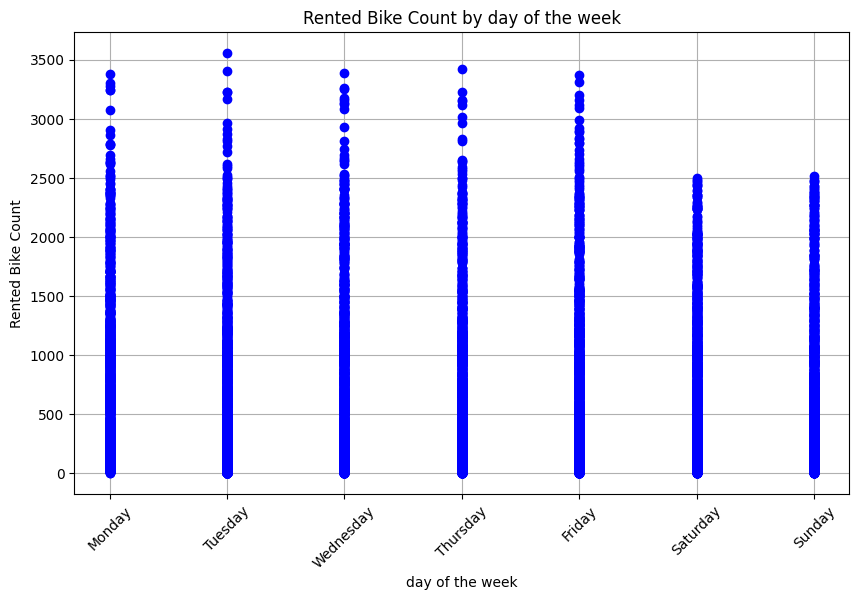

In [ ]:
import calendar
plt.figure(figsize=(10, 6))
plt.plot(rl['day of the week'], rl['Rented Bike Count'], marker='o',linestyle='None', color='b')
plt.title('Rented Bike Count by day of the week')
plt.xlabel('day of the week')
plt.ylabel('Rented Bike Count')
plt.grid(True)

# Setting month names as x-ticks
day_names = [calendar.day_name[i] for i in range(7)]
plt.xticks(ticks=range(7), labels=day_names, rotation=45)
plt.show()

In [ ]:
rl

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,day of the week,normalized_temp,norm Dew point temperature(°C),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
Date,,,,,,,,,,,,,,,,,,
2017-12-01,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,12,4,0.220280,0.224913,False,False,False,True
2017-12-01,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,12,4,0.215035,0.224913,False,False,False,True
2017-12-01,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,12,4,0.206294,0.223183,False,False,False,True
2017-12-01,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,12,4,0.202797,0.224913,False,False,False,True
2017-12-01,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,12,4,0.206294,0.207612,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,34,2.6,1894,0.0,0.0,0.0,0,1,11,4,0.384615,0.351211,True,False,False,False
2018-11-30,764,20,37,2.3,2000,0.0,0.0,0.0,0,1,11,4,0.370629,0.358131,True,False,False,False
2018-11-30,694,21,39,0.3,1968,0.0,0.0,0.0,0,1,11,4,0.356643,0.358131,True,False,False,False


In [ ]:
rl = rl.drop(columns=['Wind speed (m/s)'])
rl = rl.drop(columns=['Solar Radiation (MJ/m2)'])
rl = rl.drop(columns=['norm Dew point temperature(°C)'])
rl

,Rented Bike Count,Hour,Humidity(%),Visibility (10m),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,day of the week,normalized_temp,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
Date,,,,,,,,,,,,,,,
2017-12-01,254,0,37,2000,0.0,0.0,0,1,12,4,0.220280,False,False,False,True
2017-12-01,204,1,38,2000,0.0,0.0,0,1,12,4,0.215035,False,False,False,True
2017-12-01,173,2,39,2000,0.0,0.0,0,1,12,4,0.206294,False,False,False,True
2017-12-01,107,3,40,2000,0.0,0.0,0,1,12,4,0.202797,False,False,False,True
2017-12-01,78,4,36,2000,0.0,0.0,0,1,12,4,0.206294,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,34,1894,0.0,0.0,0,1,11,4,0.384615,True,False,False,False
2018-11-30,764,20,37,2000,0.0,0.0,0,1,11,4,0.370629,True,False,False,False
2018-11-30,694,21,39,1968,0.0,0.0,0,1,11,4,0.356643,True,False,False,False


## Model Training

In [ ]:
split_date = '2018-08-01'
train = rl.loc[rl.index < split_date]
test = rl.loc[rl.index >= split_date]

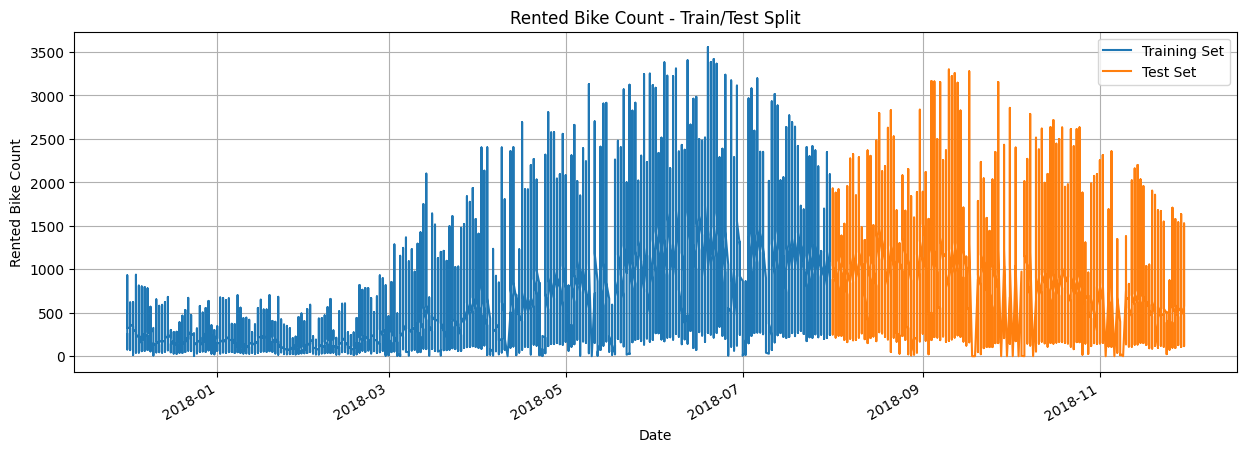

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
train['Rented Bike Count'].plot(ax=ax, label='Training Set', title='Rented Bike Count - Train/Test Split')
test['Rented Bike Count'].plot(ax=ax, label='Test Set')
ax.axvline(split_date, color='black', ls='none')
ax.legend(['Training Set', 'Test Set'])
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()


### spliting data

In [ ]:
er = rl.drop(columns=['Rented Bike Count']).columns.tolist()
er

['Hour',
 'Humidity(%)',
 'Visibility (10m)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Functioning Day',
 'month',
 'day of the week',
 'normalized_temp',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter']

In [ ]:
FEATURES = er
TARGET = 'Rented Bike Count'

In [ ]:
train_reset = train.reset_index(drop=True)
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.0001],
    'max_depth': [50,40,30],
    'min_child_weight': [10,9,8],
    'subsample': [ 0.8, 0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}
xgb_reg = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=10, verbose=3)


In [ ]:
reg = xgb.XGBRegressor(colsample_bytree=0.9, learning_rate=0.0001, max_depth=50, min_child_weight=10, n_estimators=300, subsample=0.9)

In [ ]:
!pip install optuna
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }

    # Create and train the model
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train,)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

# Optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best parameters:", best_params)

# Train the final model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


Best parameters: {'n_estimators': 499, 'learning_rate': 0.0722984692074693, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.28764750030696046, 'subsample': 0.8430381292116229, 'colsample_bytree': 0.6343873487749951, 'reg_alpha': 0.595424457688803, 'reg_lambda': 0.3022956095430879}
RMSE: 256.7245032348304
R2: 0.835218107791674


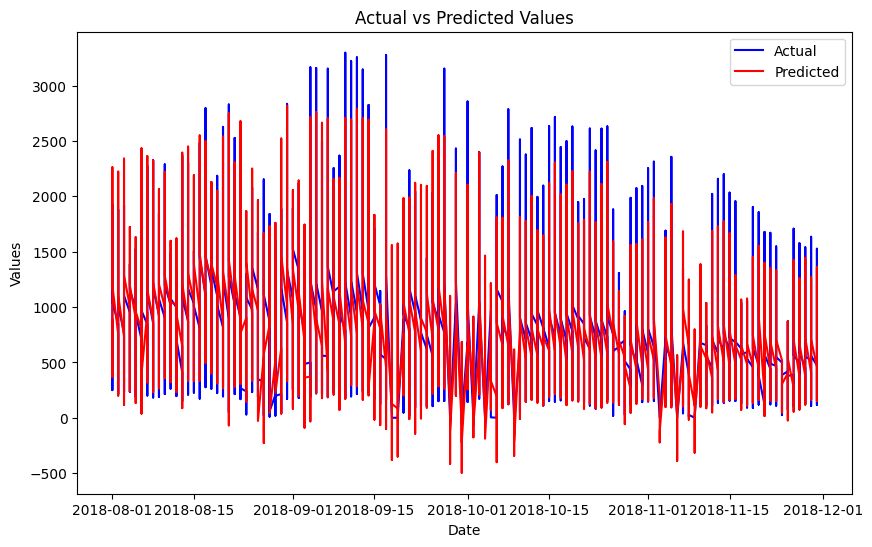

In [ ]:

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, color='blue', label='Actual')
plt.plot(y_test.index, y_pred, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


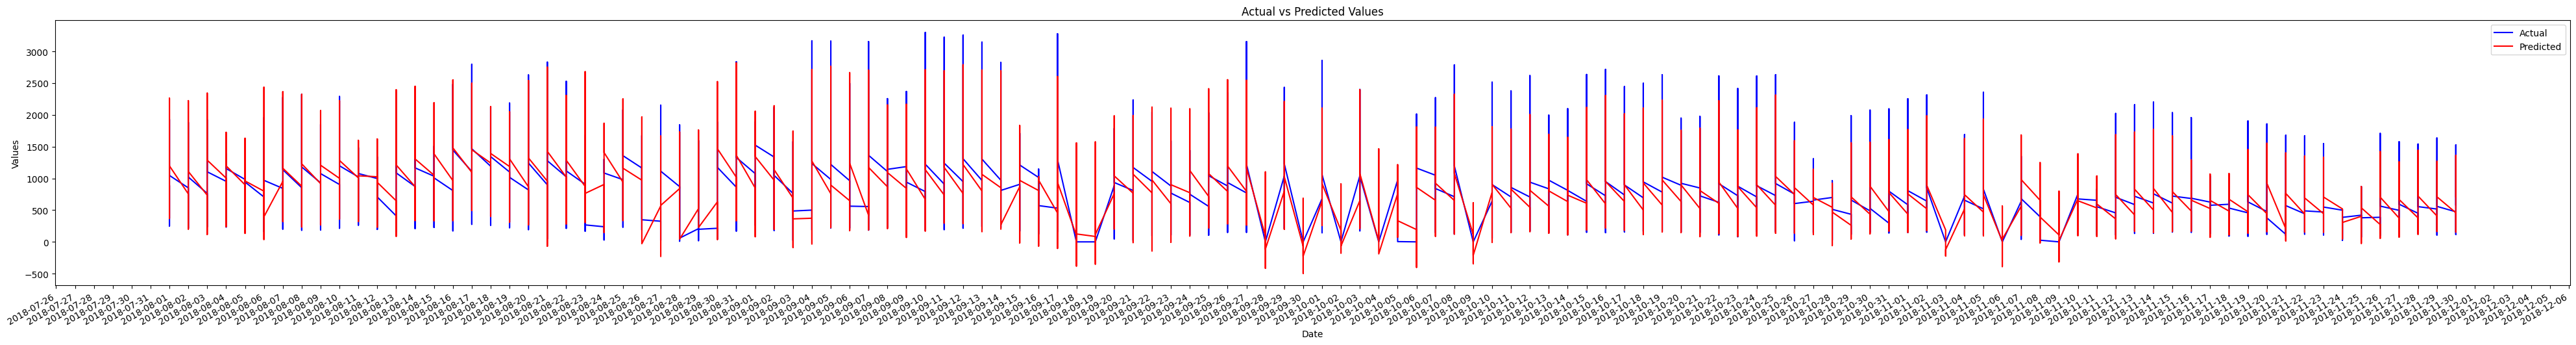

In [ ]:
import matplotlib.dates as mdates

# Plot actual vs predicted values with a focus on daily granularity
plt.figure(figsize=(50, 6))
plt.plot(y_test.index, y_test, color='blue', label='Actual')
plt.plot(y_test.index, y_pred, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Format the x-axis to show dates more clearly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates

# Rotate and align the x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

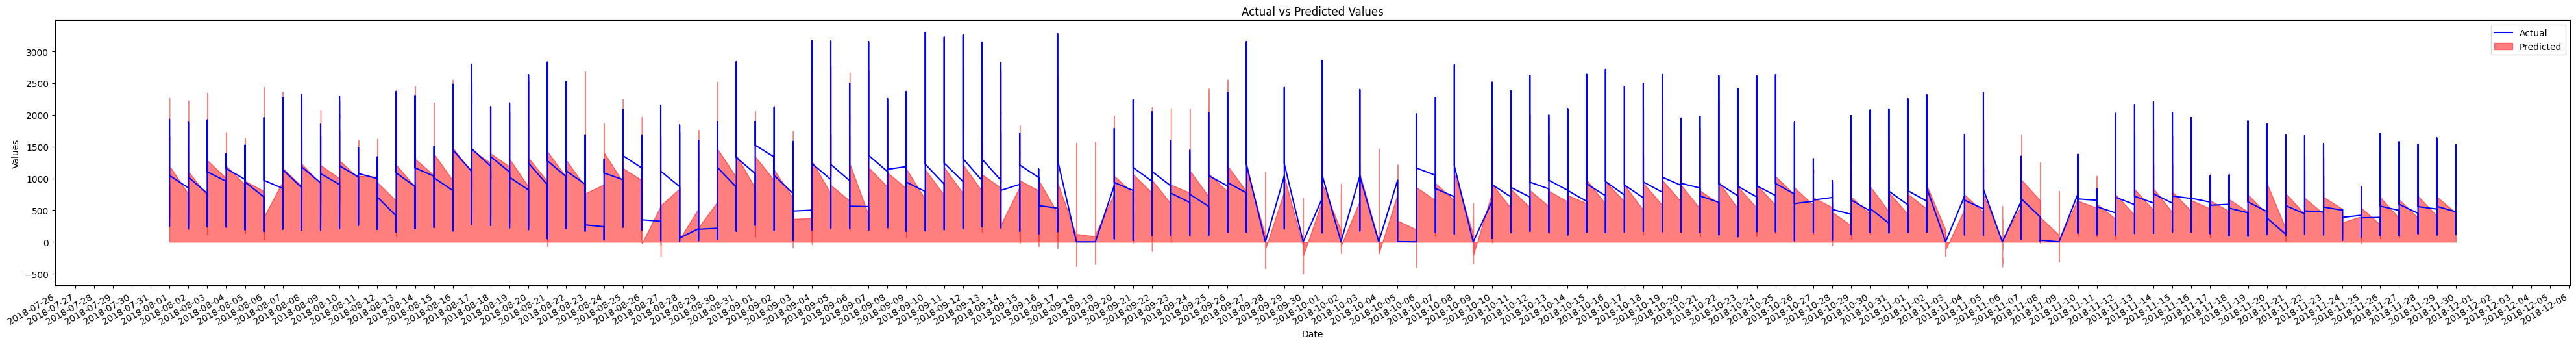

In [ ]:
import matplotlib.dates as mdates

# Plot actual vs predicted values with a focus on daily granularity in an area graph
plt.figure(figsize=(50, 6))

# Actual values as a line plot
plt.plot(y_test.index, y_test, color='blue', label='Actual')

# Predicted values as an area plot
plt.fill_between(y_test.index, y_pred, color='red', alpha=0.5, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Format the x-axis to show dates more clearly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates

# Rotate and align the x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

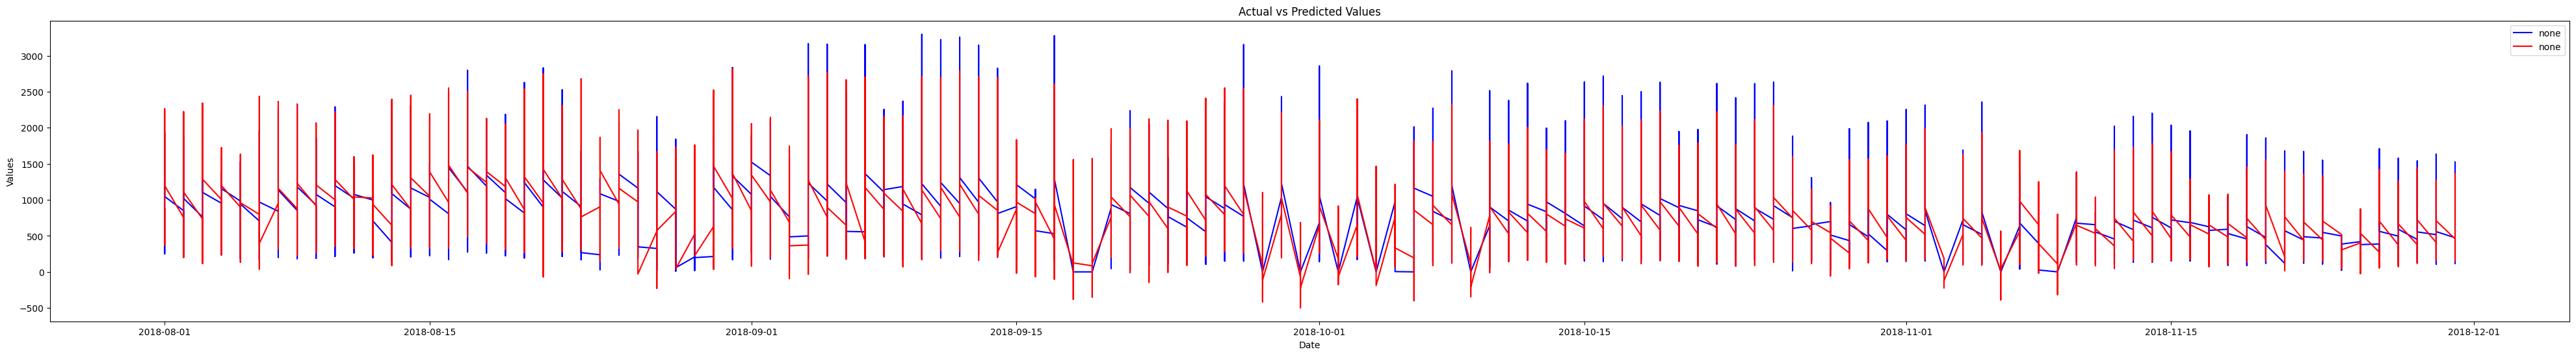

In [ ]:
plt.figure(figsize=(50, 6))
plt.plot(y_test.index, y_test, color='blue', label='none')
plt.plot(y_test.index, y_pred, color='red', label='none')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()